In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [6]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.to_csv('new.csv') #to save/download your current csv file in your device

In [8]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

<AxesSubplot:xlabel='count', ylabel='death'>

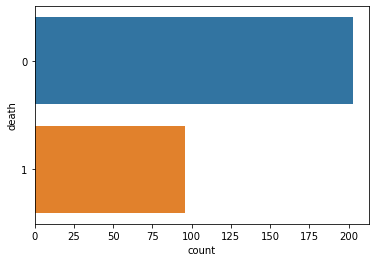

In [9]:
sns.countplot(y='death',data=df)

<AxesSubplot:xlabel='death', ylabel='count'>

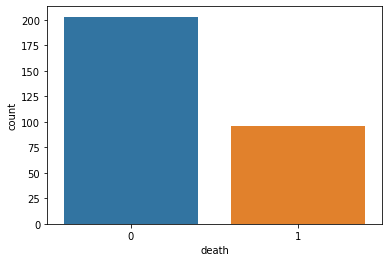

In [10]:
sns.countplot(x='death',data=df)

(<AxesSubplot:xlabel='diabetes', ylabel='count'>,)

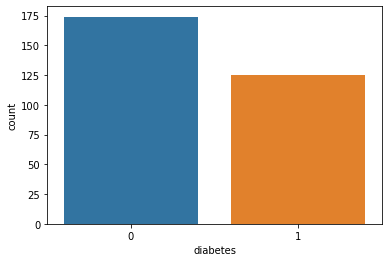

In [11]:
sns.countplot(x='diabetes', data=df) , #='death')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

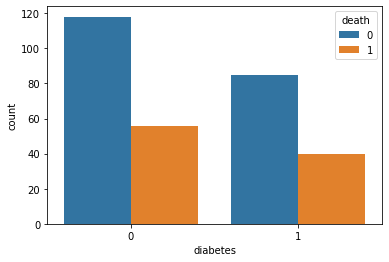

In [12]:
sns.countplot(x='diabetes', data=df, hue='death')

In [13]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

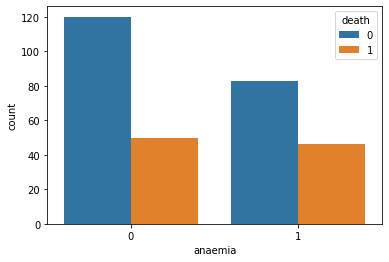

In [14]:
sns.countplot(x='anaemia', data=df, hue='death')

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

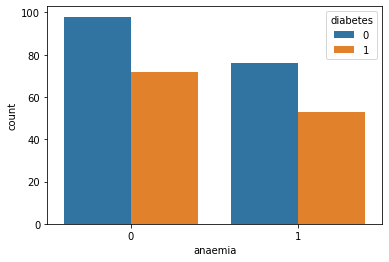

In [16]:
sns.countplot(x='anaemia', data=df, hue='diabetes')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

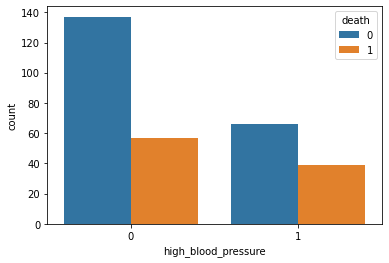

In [17]:
sns.countplot(x='high_blood_pressure', data=df, hue='death')

In [18]:
x = df.drop('death',axis=1)

In [19]:
y = df['death']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70, random_state=100)

In [22]:
ytest

221    0
139    0
235    0
175    0
230    1
      ..
287    0
29     1
164    1
233    0
3      1
Name: death, Length: 90, dtype: int64

In [23]:
ytest.shape

(90,)

In [24]:
xtest.shape

(90, 12)

# Apply Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [28]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [29]:
ytest

221    0
139    0
235    0
175    0
230    1
      ..
287    0
29     1
164    1
233    0
3      1
Name: death, Length: 90, dtype: int64

In [30]:
pred # Predicted value of Y

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [31]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1])

In [32]:
dt.score(xtest,ytest)

0.7666666666666667

# Evaluate the ML model

In [33]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [34]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.78      0.90      0.83        59\n           1       0.73      0.52      0.60        31\n\n    accuracy                           0.77        90\n   macro avg       0.75      0.71      0.72        90\nweighted avg       0.76      0.77      0.76        90\n'

In [35]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        59
           1       0.73      0.52      0.60        31

    accuracy                           0.77        90
   macro avg       0.75      0.71      0.72        90
weighted avg       0.76      0.77      0.76        90



In [36]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [37]:
test_confusion_matrix

array([[53,  6],
       [15, 16]])

<AxesSubplot:>

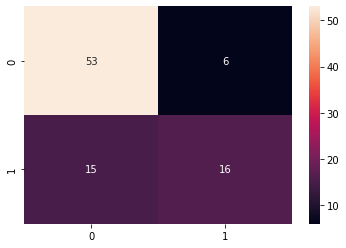

In [38]:
sns.heatmap(test_confusion_matrix, annot=True)

In [39]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [40]:
dt.score(xtest,ytest)

0.7666666666666667

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier() # default parameters

In [43]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [44]:
clf.score(xtest, ytest)

0.8555555555555555

# Some dataset for practice

In [45]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
#https://scikit-learn.org/stable/datasets/real_world.html

# Hyper Parameter Tuning

In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

# Randomized Search CV

In [47]:
# creating param_distributions for random forest
import numpy as np
trees = np.random.randint(15,150,30)

In [48]:
trees

array([137,  15,  49,  54, 135,  36, 131,  40, 134, 108,  86, 101,  93,
        24, 112, 145,  91, 144,  83,  84, 137,  46,  92, 134,  28,  58,
        42,  80,  36,  49])

In [49]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grids = {
    'n_estimators' : trees,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'criterion' : criterion,
    'min_samples_split' : min_samples_split
}

In [50]:
print(grids)

{'n_estimators': array([137,  15,  49,  54, 135,  36, 131,  40, 134, 108,  86, 101,  93,
        24, 112, 145,  91, 144,  83,  84, 137,  46,  92, 134,  28,  58,
        42,  80,  36,  49]), 'max_features': ['sqrt', 'log2'], 'max_depth': array([10,  2,  8,  7,  7,  3,  7,  3,  2, 11, 10,  6, 10,  4,  5,  4,  3,
        6,  7,  6, 11,  3,  5,  7, 11,  7,  2, 11,  7, 10,  2,  2,  9,  3,
        3, 11,  3,  6,  4, 10,  5, 10,  5,  4, 11,  6,  9,  8,  6,  7]), 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4]}


In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
rcv = RandomizedSearchCV(clf, grids, n_iter=200, cv=3)

In [53]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10,  2,  8,  7,  7,  3,  7,  3,  2, 11, 10,  6, 10,  4,  5,  4,  3,
        6,  7,  6, 11,  3,  5,  7, 11,  7,  2, 11,  7, 10,  2,  2,  9,  3,
        3, 11,  3,  6,  4, 10,  5, 10,  5,  4, 11,  6,  9,  8,  6,  7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([137,  15,  49,  54, 135,  36, 131,  40, 134, 108,  86, 101,  93,
        24, 112, 145,  91, 144,  83,  84, 137,  46,  92, 134,  28,  58,
        42,  80,  36,  49])})

In [54]:
rcv.cv_results_

{'mean_fit_time': array([0.07395061, 0.06088026, 0.08411074, 0.03166103, 0.06712842,
        0.05201062, 0.08500441, 0.02912426, 0.02895443, 0.08687607,
        0.02813236, 0.08558265, 0.01645501, 0.07213235, 0.08923403,
        0.08233452, 0.05556099, 0.01078637, 0.03293482, 0.02307677,
        0.02333999, 0.02968399, 0.06996862, 0.05570404, 0.03212627,
        0.0919919 , 0.08777094, 0.02885604, 0.05239209, 0.06110199,
        0.0362227 , 0.0599374 , 0.05500579, 0.05386631, 0.0668025 ,
        0.07280628, 0.08962361, 0.0597283 , 0.08645391, 0.05903371,
        0.08518267, 0.08743461, 0.01636704, 0.09444324, 0.08848492,
        0.08388392, 0.07108521, 0.04969978, 0.03837403, 0.05211266,
        0.05220604, 0.02432116, 0.06563926, 0.01912292, 0.08411058,
        0.01652431, 0.06164734, 0.03028361, 0.05431112, 0.0285329 ,
        0.08724634, 0.01638182, 0.0327611 , 0.06258726, 0.03746875,
        0.02424447, 0.05536628, 0.01900744, 0.06742819, 0.03841313,
        0.03644959, 0.03569063,

In [55]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [56]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.073951,0.016292,0.005310,0.000129,92,3,log2,10,entropy,"{'n_estimators': 92, 'min_samples_split': 3, '...",0.842857,0.800000,0.855072,0.832643,0.023615,66
1,0.060880,0.000762,0.005185,0.000158,92,2,log2,11,gini,"{'n_estimators': 92, 'min_samples_split': 2, '...",0.871429,0.757143,0.826087,0.818219,0.046987,150
2,0.084111,0.000596,0.006917,0.000092,135,2,log2,2,gini,"{'n_estimators': 135, 'min_samples_split': 2, ...",0.828571,0.800000,0.782609,0.803727,0.018948,184
3,0.031661,0.000172,0.003076,0.000099,46,2,sqrt,7,entropy,"{'n_estimators': 46, 'min_samples_split': 2, '...",0.814286,0.771429,0.869565,0.818427,0.040171,142
4,0.067128,0.000331,0.005813,0.000216,108,2,sqrt,2,gini,"{'n_estimators': 108, 'min_samples_split': 2, ...",0.814286,0.800000,0.768116,0.794134,0.019300,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.036913,0.000198,0.003347,0.000004,54,3,sqrt,11,entropy,"{'n_estimators': 54, 'min_samples_split': 3, '...",0.857143,0.785714,0.884058,0.842305,0.041497,18
196,0.062980,0.000045,0.005294,0.000012,101,2,log2,2,entropy,"{'n_estimators': 101, 'min_samples_split': 2, ...",0.842857,0.800000,0.768116,0.803658,0.030622,186
197,0.036552,0.000201,0.003323,0.000013,54,4,log2,9,entropy,"{'n_estimators': 54, 'min_samples_split': 4, '...",0.871429,0.785714,0.811594,0.822912,0.035896,138
198,0.026253,0.000054,0.002675,0.000022,40,4,log2,4,gini,"{'n_estimators': 40, 'min_samples_split': 4, '...",0.842857,0.771429,0.797101,0.803796,0.029542,181


In [57]:
rcv.best_score_

0.8661835748792269

In [58]:
rcv.best_params_

{'n_estimators': 101,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini'}

In [59]:
clf2 = rcv.best_estimator_

In [60]:
clf2.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                       n_estimators=101)

In [61]:
clf2.score(xtest, ytest)

0.8444444444444444